In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
# Data Loading

train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
test=pd.read_csv('/content/Google_Stock_Price_Test.csv')

In [31]:
train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:

#keras only takes numpy array
training_set = train.iloc[:, 1: 2].values

In [5]:

training_set.shape

(1258, 1)

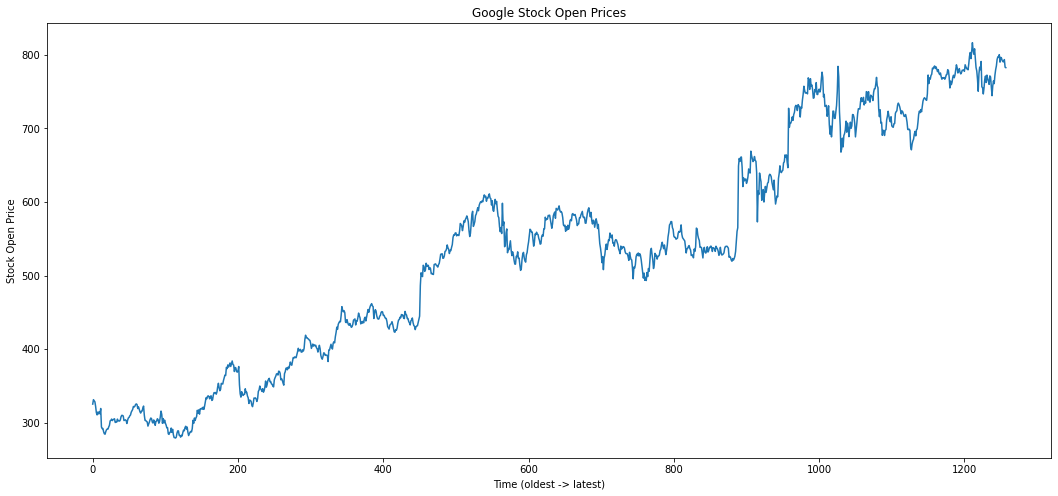

In [6]:

plt.figure(figsize=(18, 8))
plt.plot(train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [8]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape

(1198, 60)

In [10]:
y_train.shape

(1198,)

In [11]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

In [12]:

X_train.shape

(1198, 60, 1)

In [13]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [14]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

### Model with Adam optimzer and with the iteration of 250

In [28]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
38/38 [==============================] - 4s 113ms/step - loss: 0.0012
Epoch 2/250
38/38 [==============================] - 4s 116ms/step - loss: 0.0013
Epoch 3/250
38/38 [==============================] - 4s 117ms/step - loss: 0.0013
Epoch 4/250
38/38 [==============================] - 4s 113ms/step - loss: 0.0011
Epoch 5/250
38/38 [==============================] - 4s 116ms/step - loss: 0.0012
Epoch 6/250
38/38 [==============================] - 5s 120ms/step - loss: 0.0012
Epoch 7/250
38/38 [==============================] - 5s 125ms/step - loss: 0.0011
Epoch 8/250
38/38 [==============================] - 5s 119ms/step - loss: 0.0011
Epoch 9/250
38/38 [==============================] - 5s 122ms/step - loss: 0.0011
Epoch 10/250
38/38 [==============================] - 5s 123ms/step - loss: 0.0010
Epoch 11/250
38/38 [==============================] - 5s 121ms/step - loss: 0.0011
Epoch 12/250
38/38 [==============================] - 5s 120ms/step - loss: 0.0010
Epoch 13/250


In [17]:
 dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [18]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [19]:
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(20, 1)

In [20]:

#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((train['Open'], dataset_test['Open']), 
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [21]:
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [22]:
len(inputs)

80

In [23]:

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
X_test.shape

(20, 60, 1)

In [25]:
predicted_stock_price = regressor.predict(X_test)

In [26]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

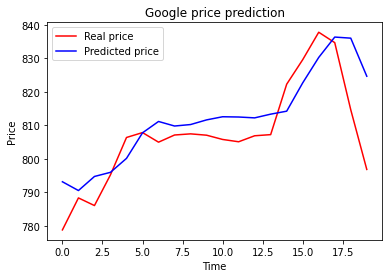

In [27]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Modiying the model by adding tuning learning rate=0.0006

In [32]:
from keras.optimizers import Adam
optimize = Adam(lr = 0.0006)
regressor.compile(optimizer = optimize, loss = 'mean_squared_error')
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)


Epoch 1/250
38/38 [==============================] - 4s 109ms/step - loss: 7.6820e-04
Epoch 2/250
38/38 [==============================] - 4s 115ms/step - loss: 8.2586e-04
Epoch 3/250
38/38 [==============================] - 4s 114ms/step - loss: 7.9001e-04
Epoch 4/250
38/38 [==============================] - 4s 114ms/step - loss: 8.1811e-04
Epoch 5/250
38/38 [==============================] - 4s 115ms/step - loss: 7.5500e-04
Epoch 6/250
38/38 [==============================] - 4s 116ms/step - loss: 8.2175e-04
Epoch 7/250
38/38 [==============================] - 5s 121ms/step - loss: 7.9022e-04
Epoch 8/250
38/38 [==============================] - 4s 117ms/step - loss: 8.2554e-04
Epoch 9/250
38/38 [==============================] - 4s 114ms/step - loss: 8.1489e-04
Epoch 10/250
38/38 [==============================] - 4s 116ms/step - loss: 8.2347e-04
Epoch 11/250
38/38 [==============================] - 4s 115ms/step - loss: 7.9083e-04
Epoch 12/250
38/38 [==============================] 

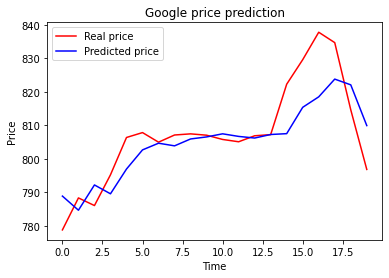

In [33]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Model Tuning with SGD optimiser

In [34]:
from keras.optimizers import SGD
optimize = SGD(lr = 0.0006)
regressor.compile(optimizer = optimize, loss = 'mean_squared_error')
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
38/38 [==============================] - 4s 108ms/step - loss: 7.4553e-04
Epoch 2/250
38/38 [==============================] - 4s 113ms/step - loss: 7.3390e-04
Epoch 3/250
38/38 [==============================] - 4s 113ms/step - loss: 6.9152e-04
Epoch 4/250
38/38 [==============================] - 4s 115ms/step - loss: 6.6934e-04
Epoch 5/250
38/38 [==============================] - 4s 112ms/step - loss: 6.5916e-04
Epoch 6/250
38/38 [==============================] - 4s 115ms/step - loss: 6.5817e-04
Epoch 7/250
38/38 [==============================] - 4s 117ms/step - loss: 7.2623e-04
Epoch 8/250
38/38 [==============================] - 5s 121ms/step - loss: 7.4238e-04
Epoch 9/250
38/38 [==============================] - 5s 119ms/step - loss: 7.0255e-04
Epoch 10/250
38/38 [==============================] - 4s 118ms/step - loss: 7.1434e-04
Epoch 11/250
38/38 [==============================] - 5s 119ms/step - loss: 7.6726e-04
Epoch 12/250
38/38 [==============================] 

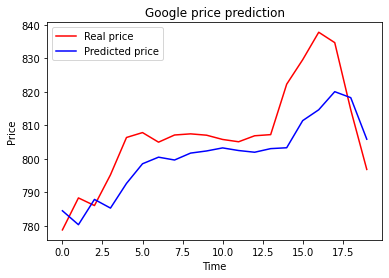

In [35]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Changing the learning rate and increasing the number of iterations

In [36]:
from keras.optimizers import SGD
optimize = SGD(lr = 0.00006)
regressor.compile(optimizer = optimize, loss = 'mean_squared_error')
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 300)

Epoch 1/300
38/38 [==============================] - 5s 124ms/step - loss: 6.9170e-04
Epoch 2/300
38/38 [==============================] - 4s 109ms/step - loss: 6.9155e-04
Epoch 3/300
38/38 [==============================] - 4s 112ms/step - loss: 7.6427e-04
Epoch 4/300
38/38 [==============================] - 4s 114ms/step - loss: 6.5617e-04
Epoch 5/300
38/38 [==============================] - 4s 113ms/step - loss: 7.2128e-04
Epoch 6/300
38/38 [==============================] - 4s 109ms/step - loss: 7.0501e-04
Epoch 7/300
38/38 [==============================] - 4s 110ms/step - loss: 6.6871e-04
Epoch 8/300
38/38 [==============================] - 4s 111ms/step - loss: 7.2793e-04
Epoch 9/300
38/38 [==============================] - 4s 111ms/step - loss: 7.6782e-04
Epoch 10/300
38/38 [==============================] - 4s 110ms/step - loss: 7.1960e-04
Epoch 11/300
38/38 [==============================] - 4s 110ms/step - loss: 6.5818e-04
Epoch 12/300
38/38 [==============================] 

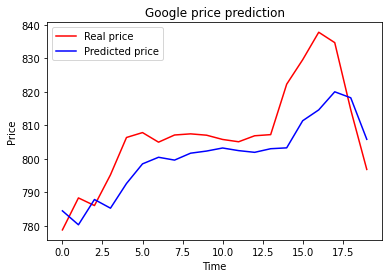

In [37]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

There are 3 LSTM layers in the final model. The parameters such as optimizers, learning rate and iteration number has been modified for visualizing diffrent results. For the lower number of iterations the predicted graph was not aligning with the actual ones. Increasing the number of iteration  between 250 and 300 has produced better results.

The Adam optimizer has performed better than SGD. The graphs of Adam optimer is much closer than the SGD. The SGD has been processed with the iteration of 300 but the result were same as of less number of transaction. The best results come up with the parameters, optimizers=Adam, Learning Rate=0.00006, Number of Iteration =250